In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
import tensorflow as tf

2023-04-22 15:17:47.081713: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-22 15:17:47.084703: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 15:17:47.138777: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 15:17:47.139447: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 15:17:48.192583: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
df = pd.read_csv(r'Kanpur_data.csv')
df = df.set_index('dateTime')
df.index = pd.to_datetime(df.index, dayfirst = True)
df.head()

/tmp/ipykernel_338751/2972504982.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, dayfirst = True)


tempMax    dew  earthSkin  precipitation  pressure   
dateTime                                                         
1981-01-30    26.01   8.31      17.63           0.00     99.77  \
1981-01-31    24.01  10.33      17.31           1.09     99.93   
1981-02-01    23.51  10.25      16.73           0.00    100.22   
1981-02-02    21.51   4.96      13.65           2.61    100.41   
1981-02-03    22.80   0.77      13.42           0.09    100.37   

            relativeHumidity  specificHumidity   temp  tempMin  tempRange   
dateTime                                                                    
1981-01-30             50.62              6.84  19.29    13.72    -260.85  \
1981-01-31             65.50              7.87  17.33    12.75    -261.88   
1981-02-01             70.56              7.81  16.35    11.09    -260.74   
1981-02-02             55.88              5.49  14.76     8.48    -260.12   
1981-02-03             38.06              4.03  15.58     8.57    -258.92   

            ...  windSpeed10  windSpeed10Max  windSpeed10Min   
dateTime    ...                                                
1981-01-30  ...         1.48            3.14            0.32  \
1981-01-31  ...         2.30            3.87            0.70   
1981-02-01  ...         2.16            2.91            0.43   
1981-02-02  ...         2.54            3.91            1.08   
1981-02-03  ...         1.19            2.12            0.49   

            windSpeed10Range  windSpeed50  windSpeed50Max  windSpeed50Min   
dateTime                                                                    
1981-01-30              2.82         2.12            6.23            0.40  \
1981-01-31              3.17         3.83            6.72            0.68   
1981-02-01              2.47         3.66            5.62            0.53   
1981-02-02              2.83         3.63            6.09            1.47   
1981-02-03              1.62         1.58            2.75            0.65   

            windSpeed50Range  windDirection10  windDirection50  
dateTime                                                        
1981-01-30              5.83           155.31           155.50  
1981-01-31              6.04           101.62           101.44  
1981-02-01              5.09           173.81           173.38  
1981-02-02              4.63           294.12           294.19  
1981-02-03              2.10           248.31           247.69  

[5 rows x 22 columns]

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
df_transformed = scaler.fit_transform(df)
print(df_transformed)
df.shape

[[0.35229155 0.5867358  0.30716113 ... 0.35369128 0.41859255 0.41713829]
 [0.29707344 0.63037373 0.29897698 ... 0.36778523 0.25424715 0.25086122]
 [0.28326891 0.6286455  0.28414322 ... 0.30402685 0.47522116 0.47213337]
 ...
 [0.53092214 0.66580255 0.54424552 ... 0.36979866 0.24047262 0.24412525]
 [0.51325235 0.67984446 0.55191816 ... 0.31342282 0.26630751 0.27008489]
 [0.39701822 0.7029596  0.47033248 ... 0.1738255  0.52689094 0.52306841]]


(15387, 22)

In [4]:
df.columns

Index(['tempMax', 'dew', 'earthSkin', 'precipitation', 'pressure',
       'relativeHumidity', 'specificHumidity', 'temp', 'tempMin', 'tempRange',
       'wetBulb', 'windSpeed2', 'windSpeed10', 'windSpeed10Max',
       'windSpeed10Min', 'windSpeed10Range', 'windSpeed50', 'windSpeed50Max',
       'windSpeed50Min', 'windSpeed50Range', 'windDirection10',
       'windDirection50'],
      dtype='object')

/tmp/ipykernel_338751/4231382843.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(25, 6))


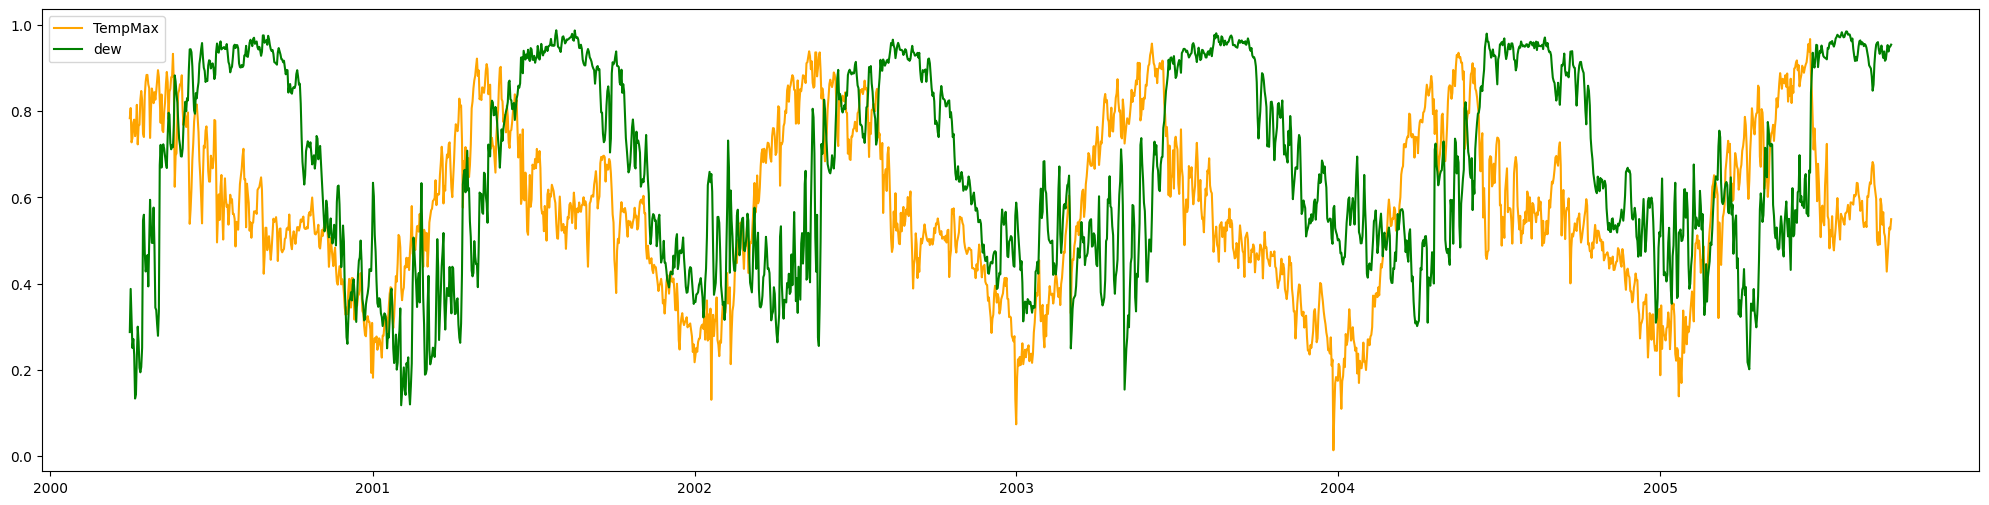

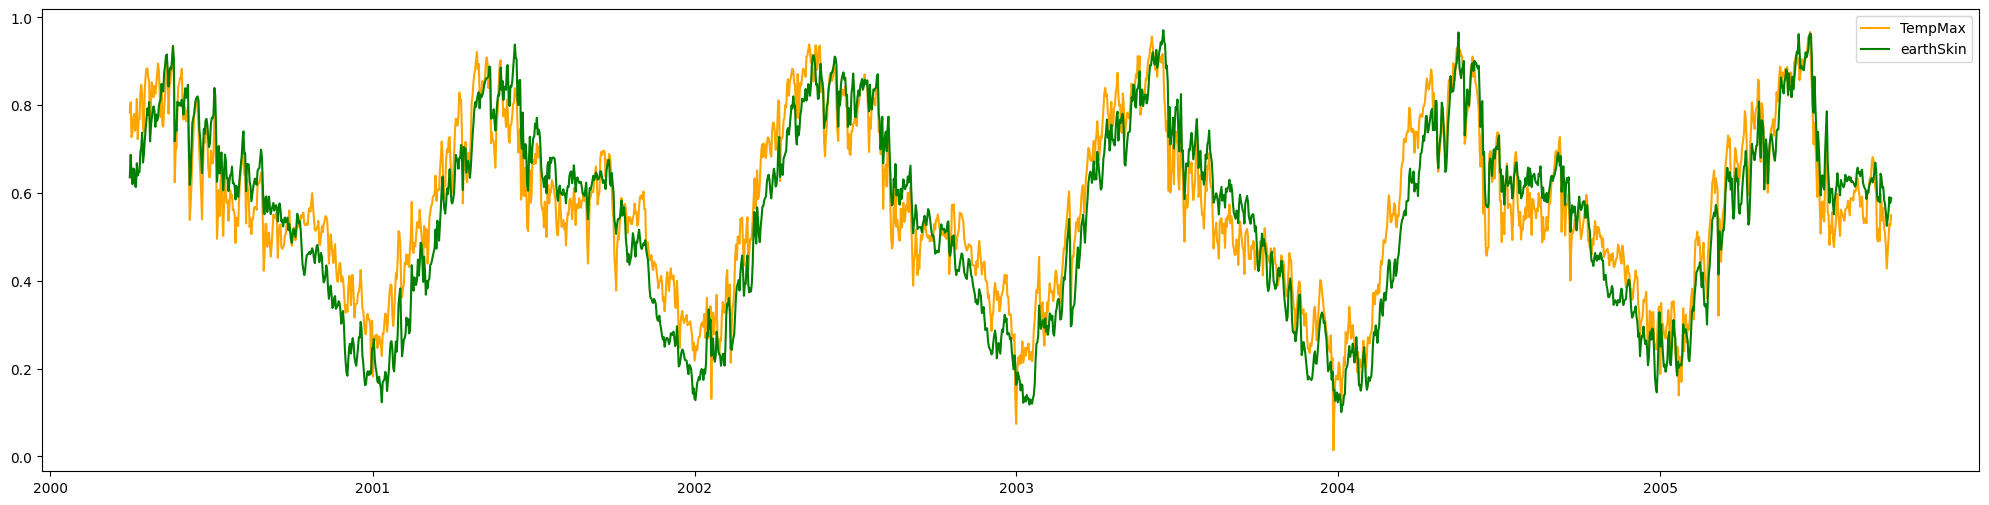

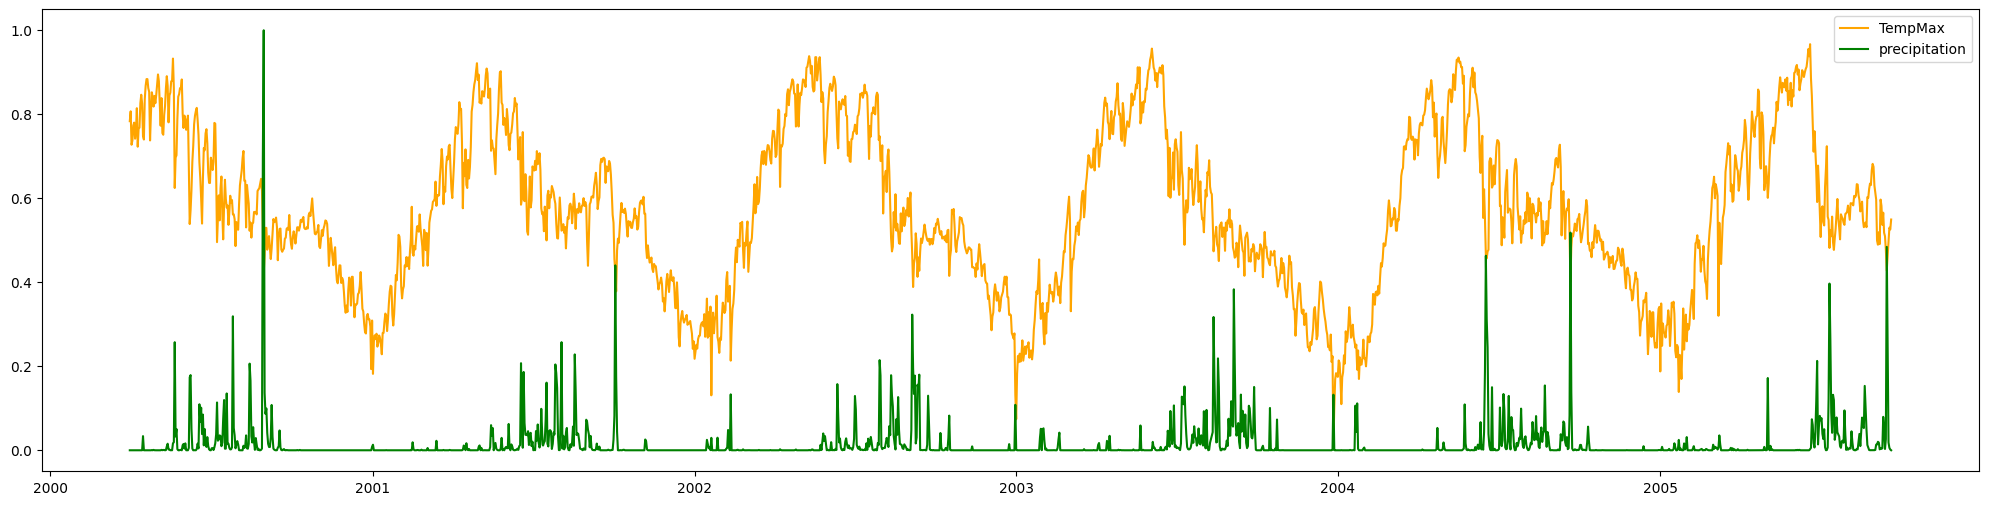

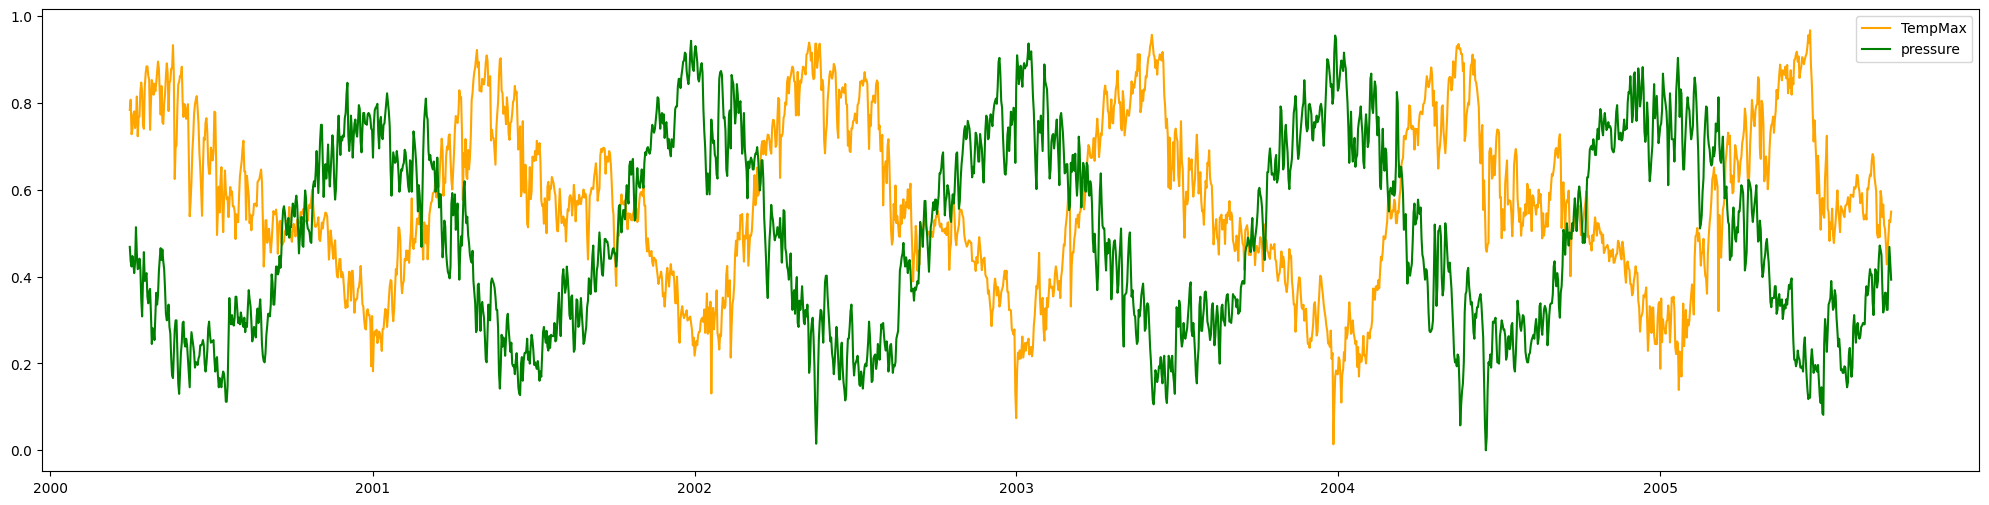

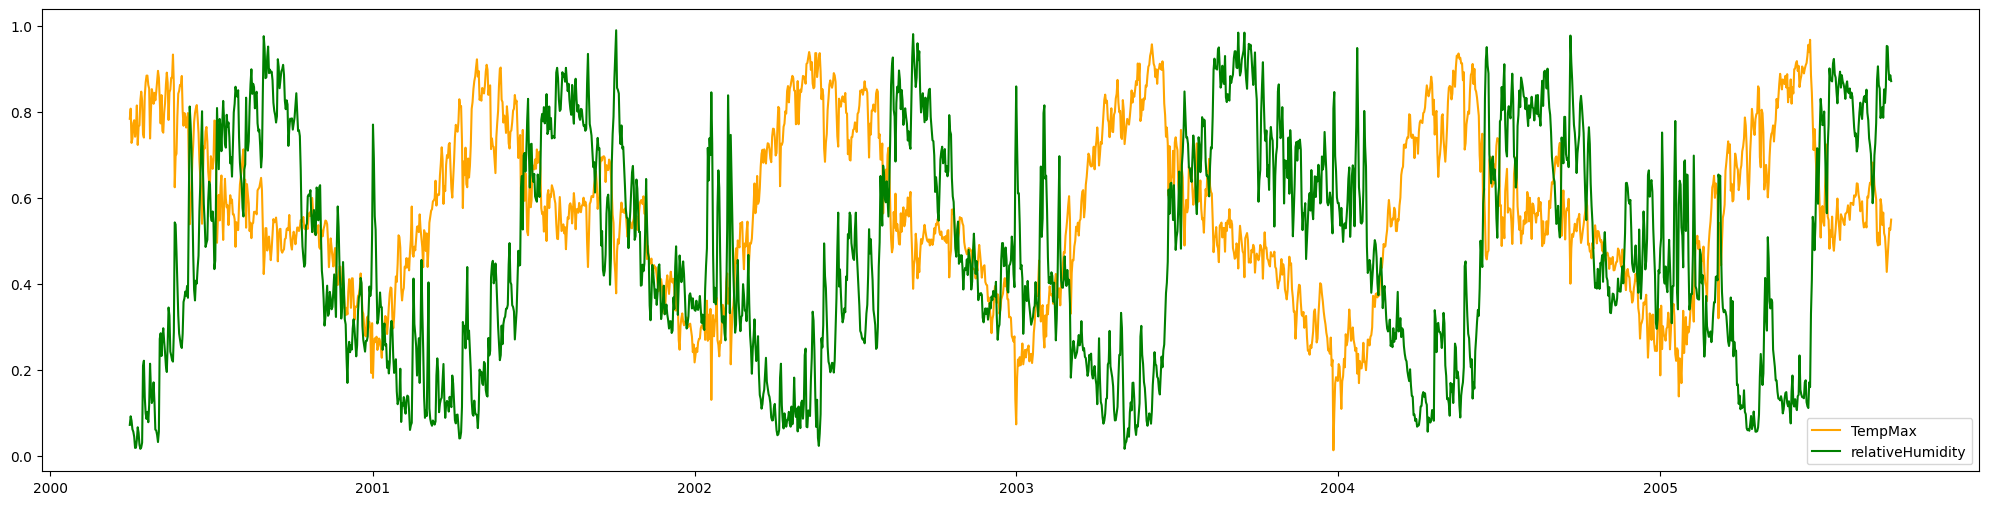

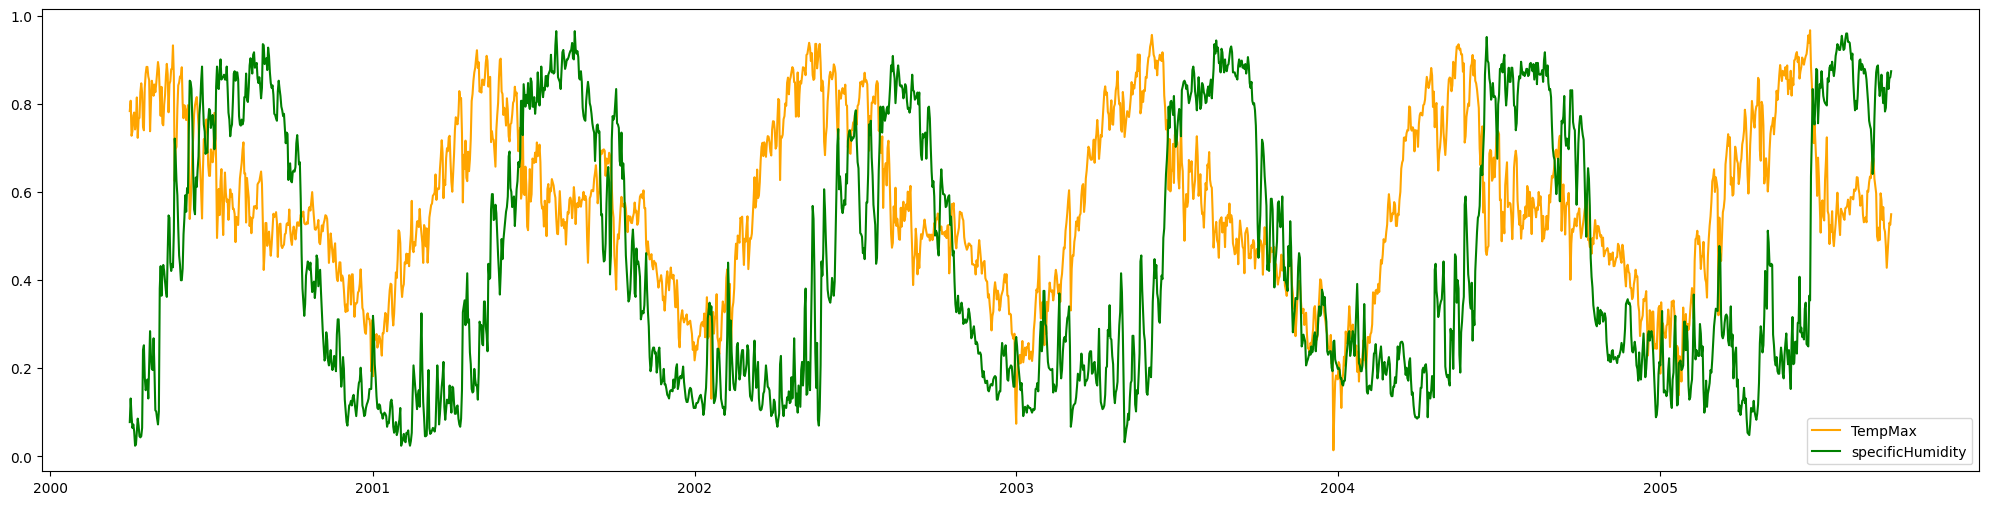

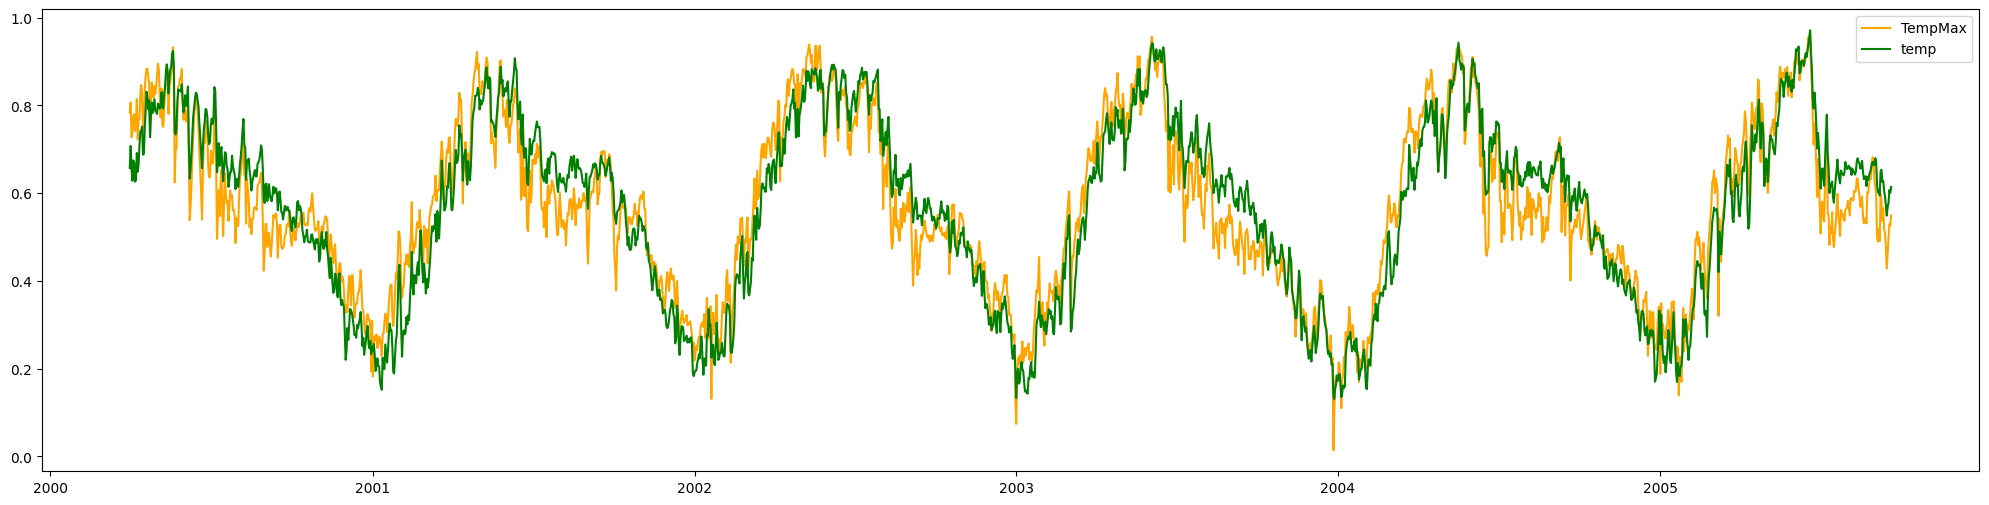

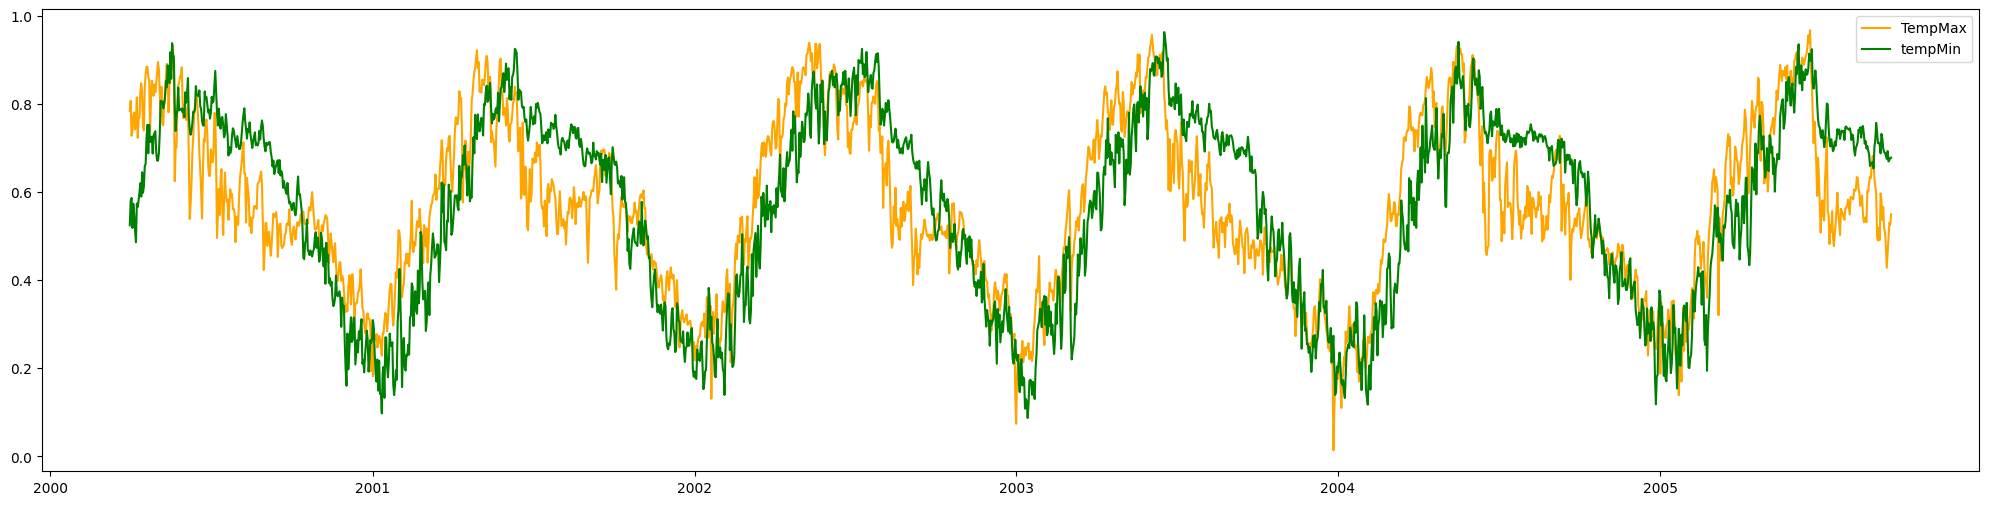

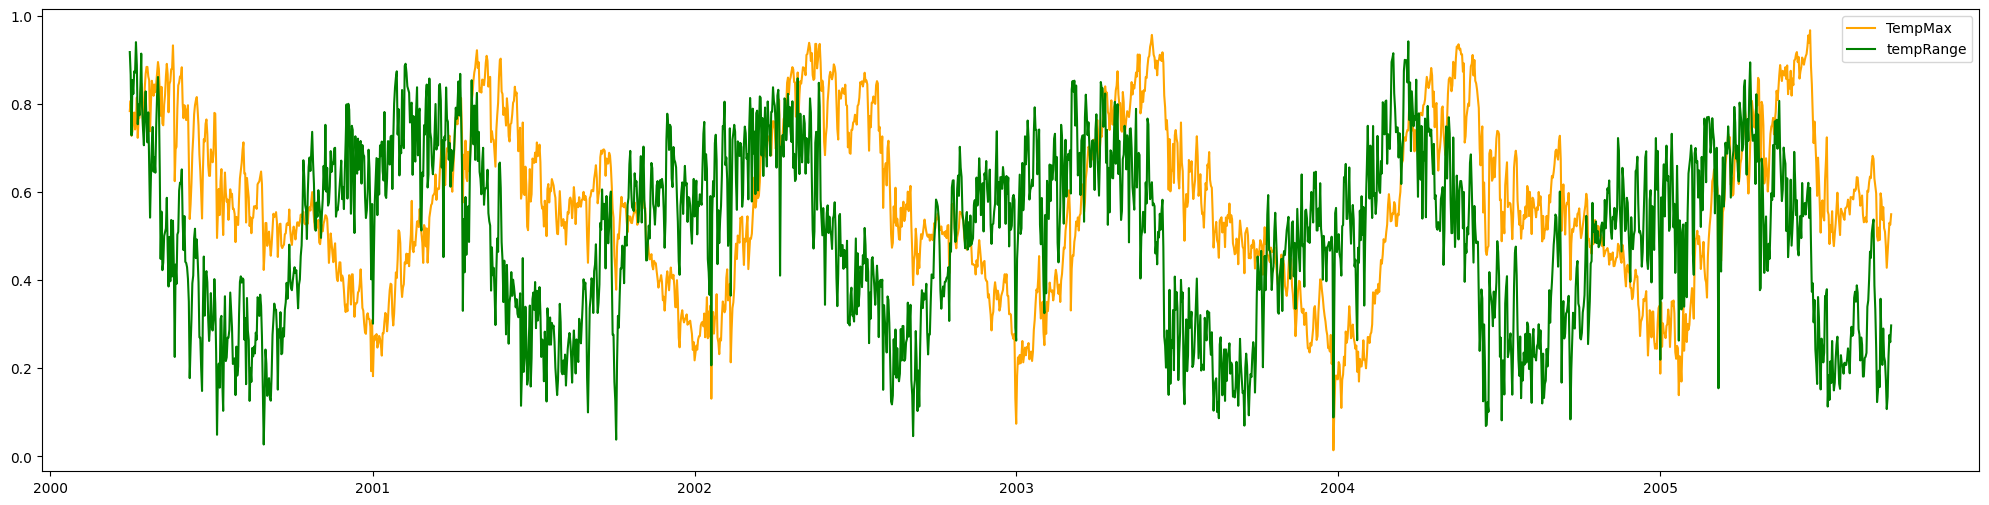

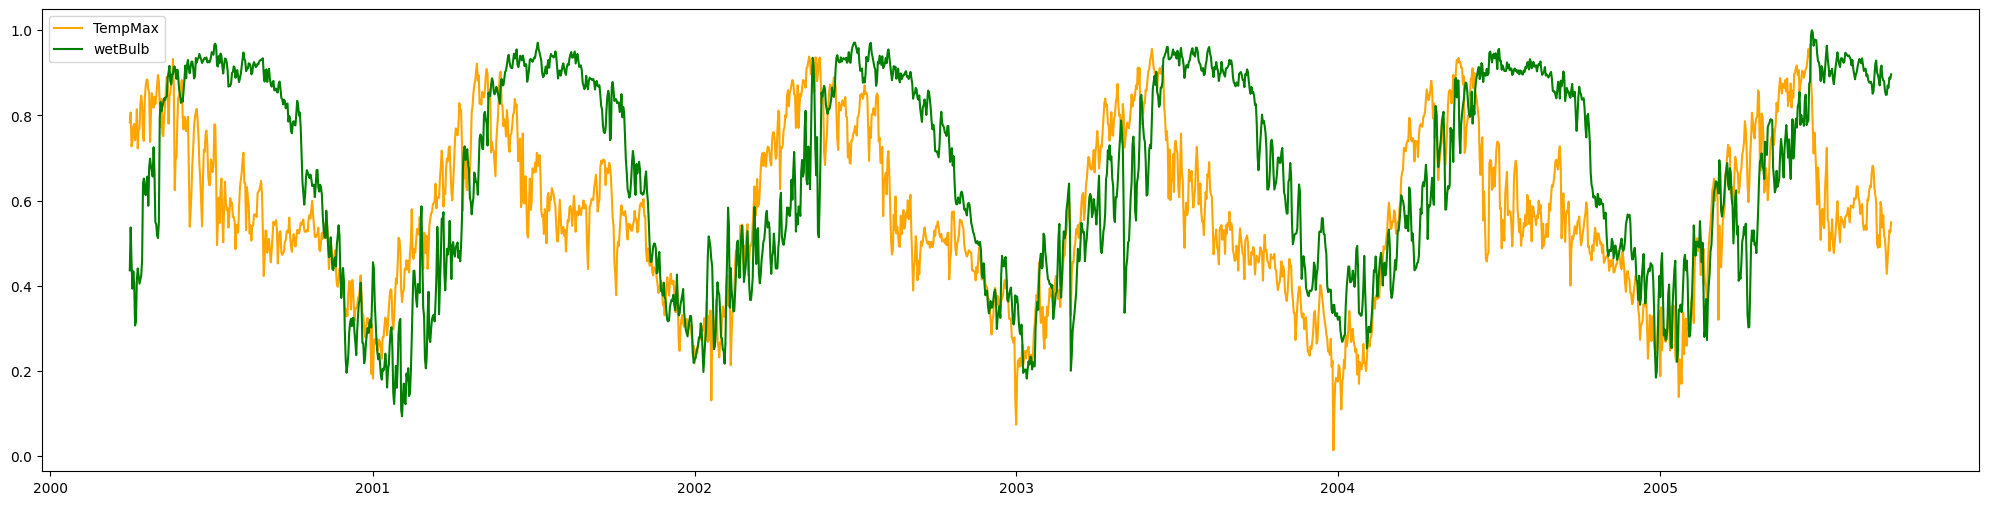

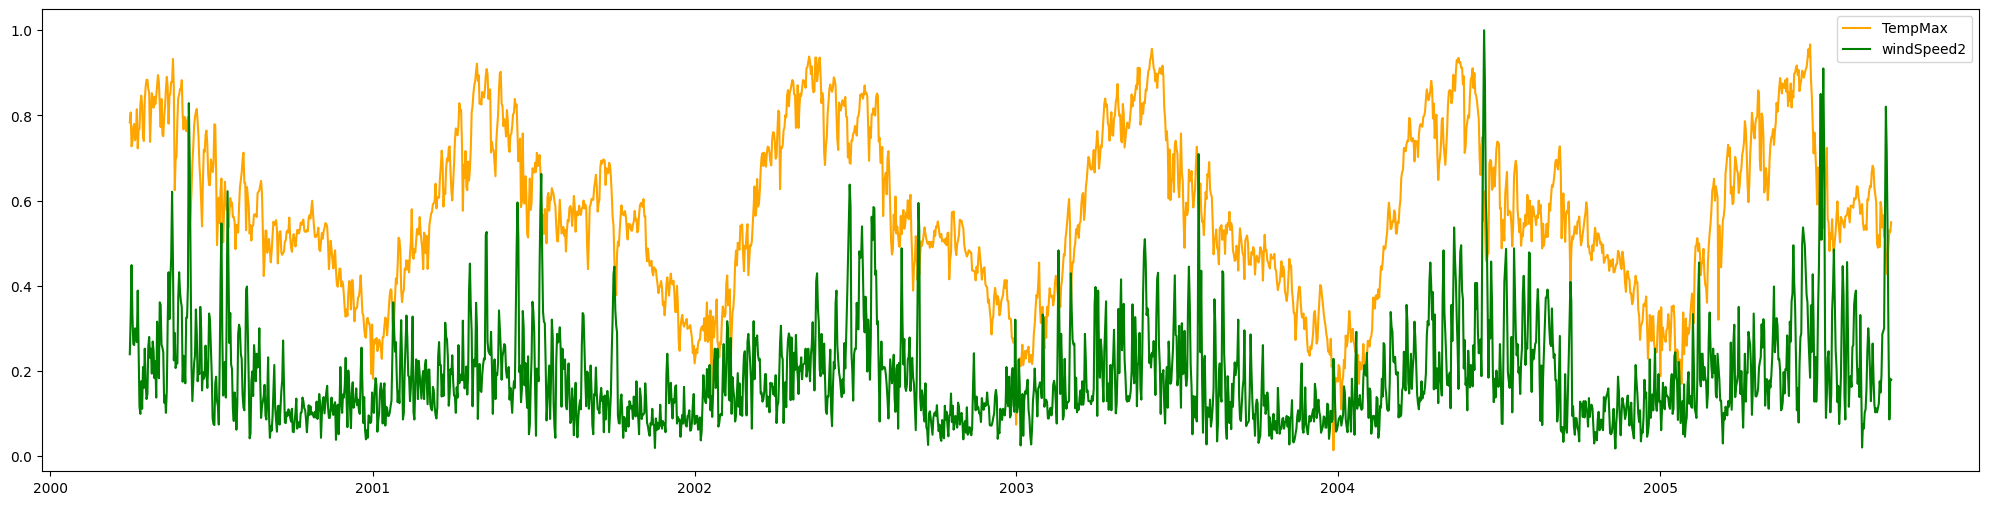

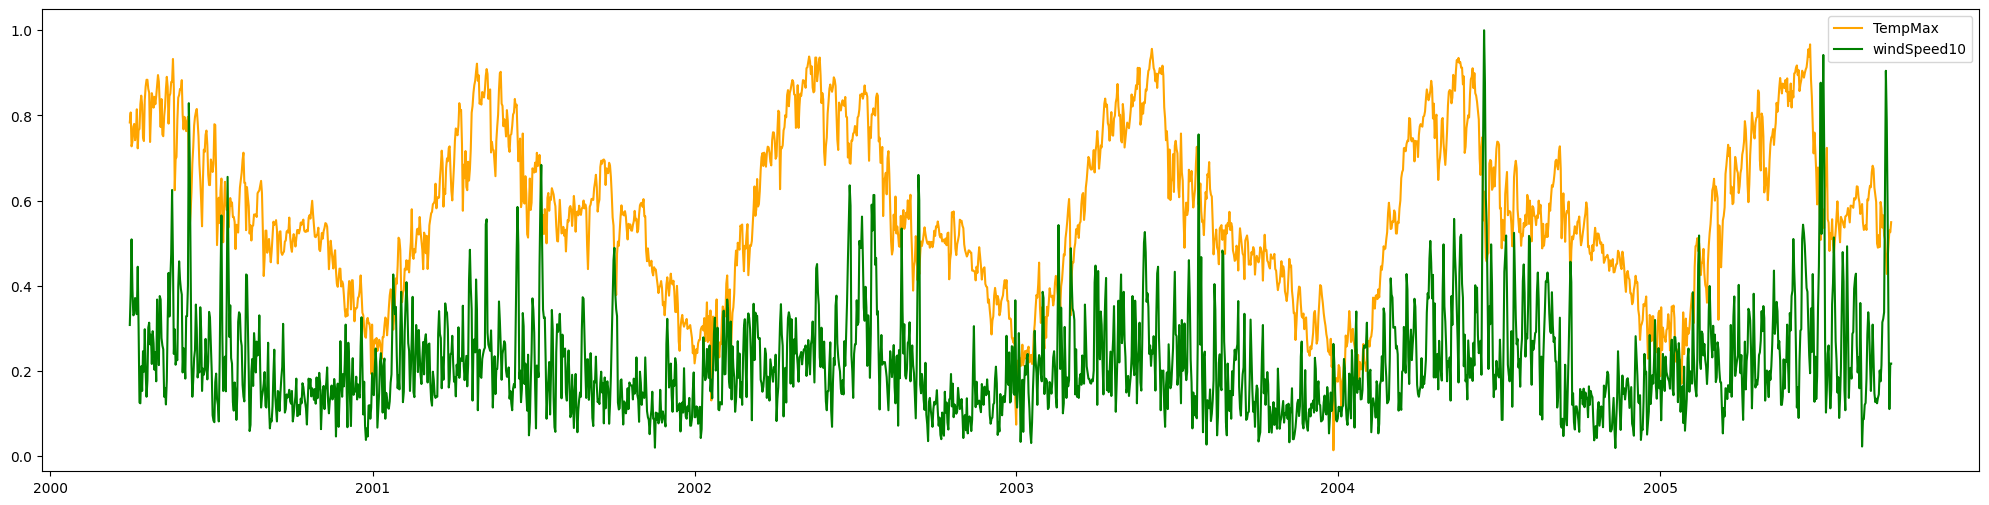

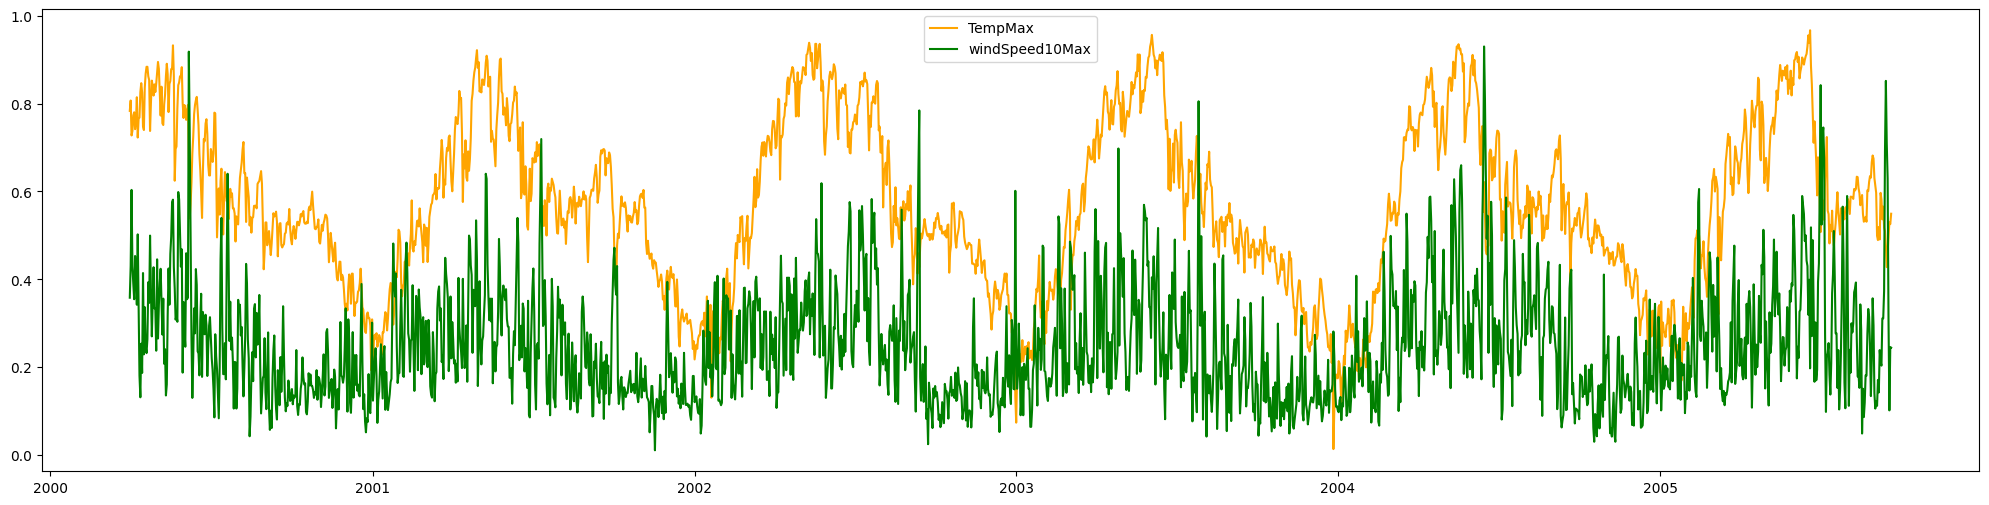

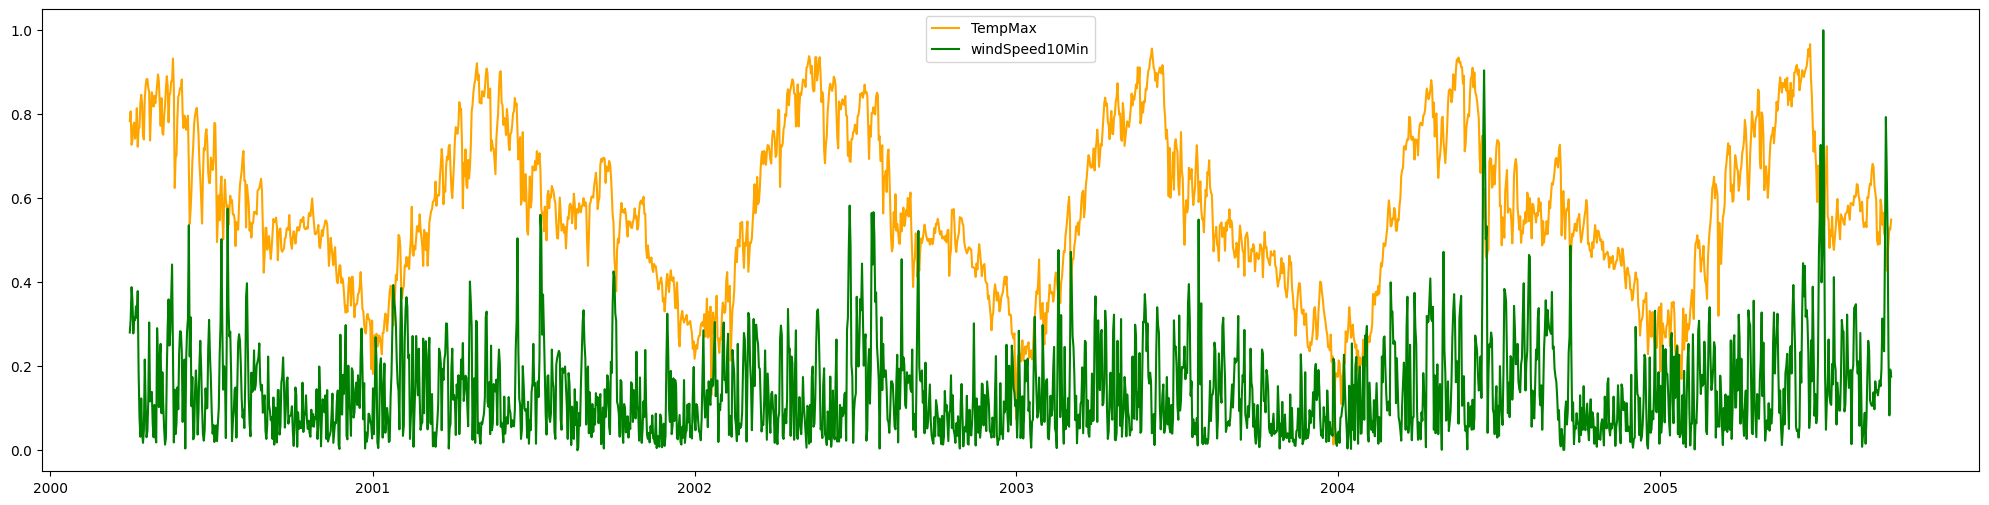

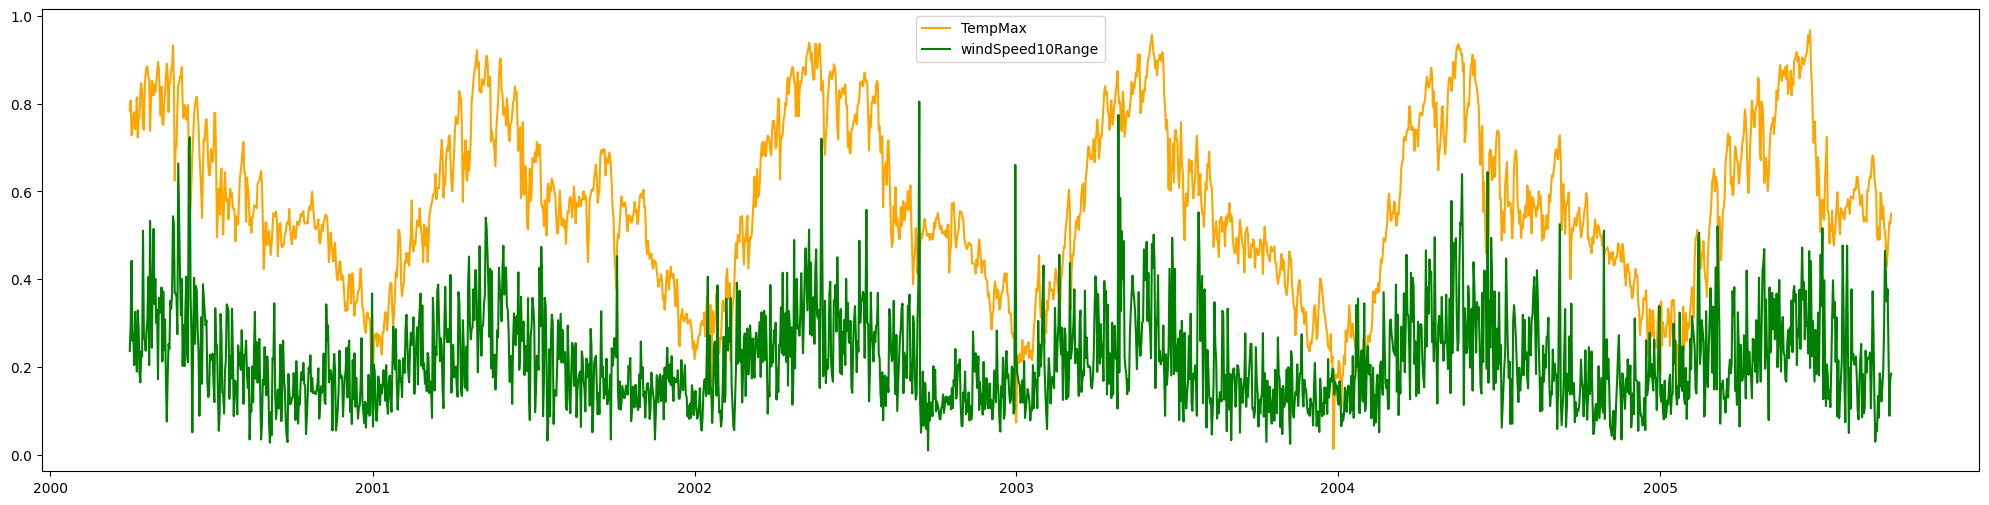

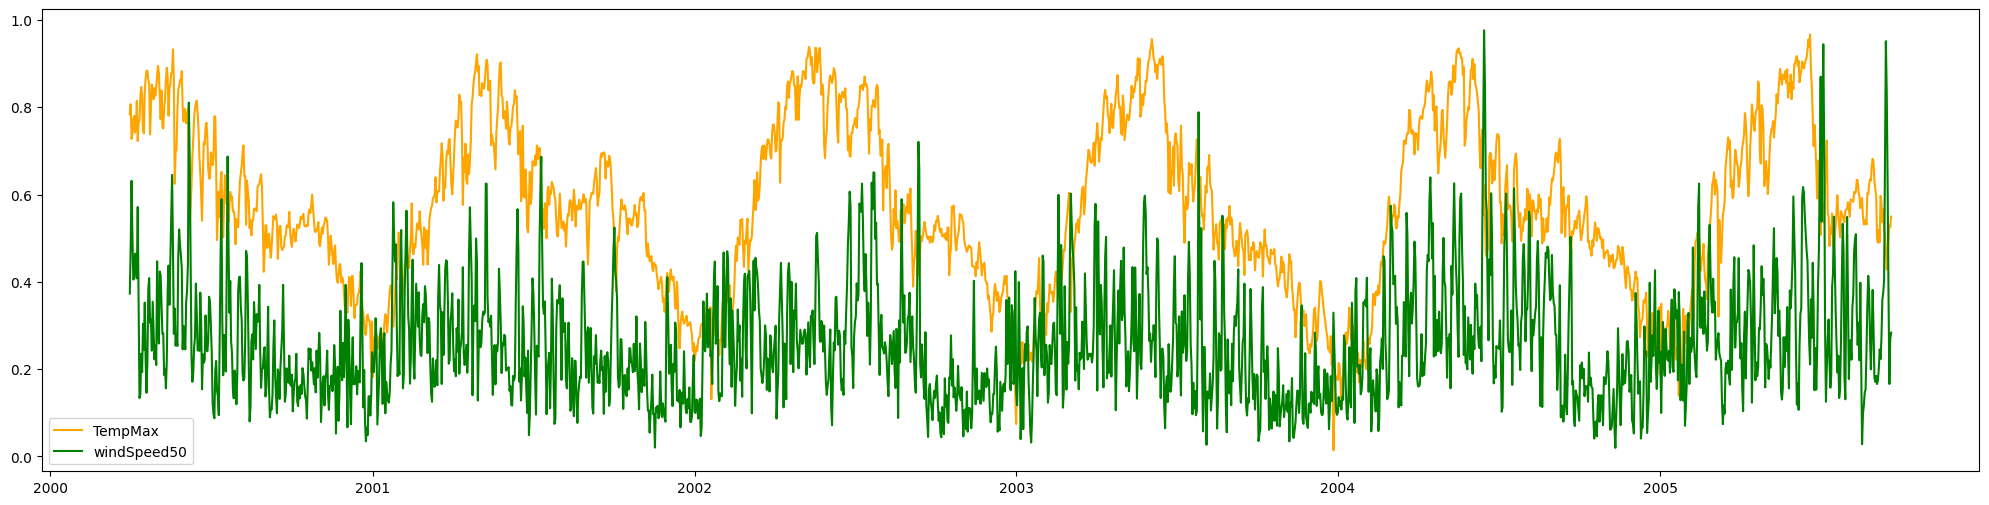

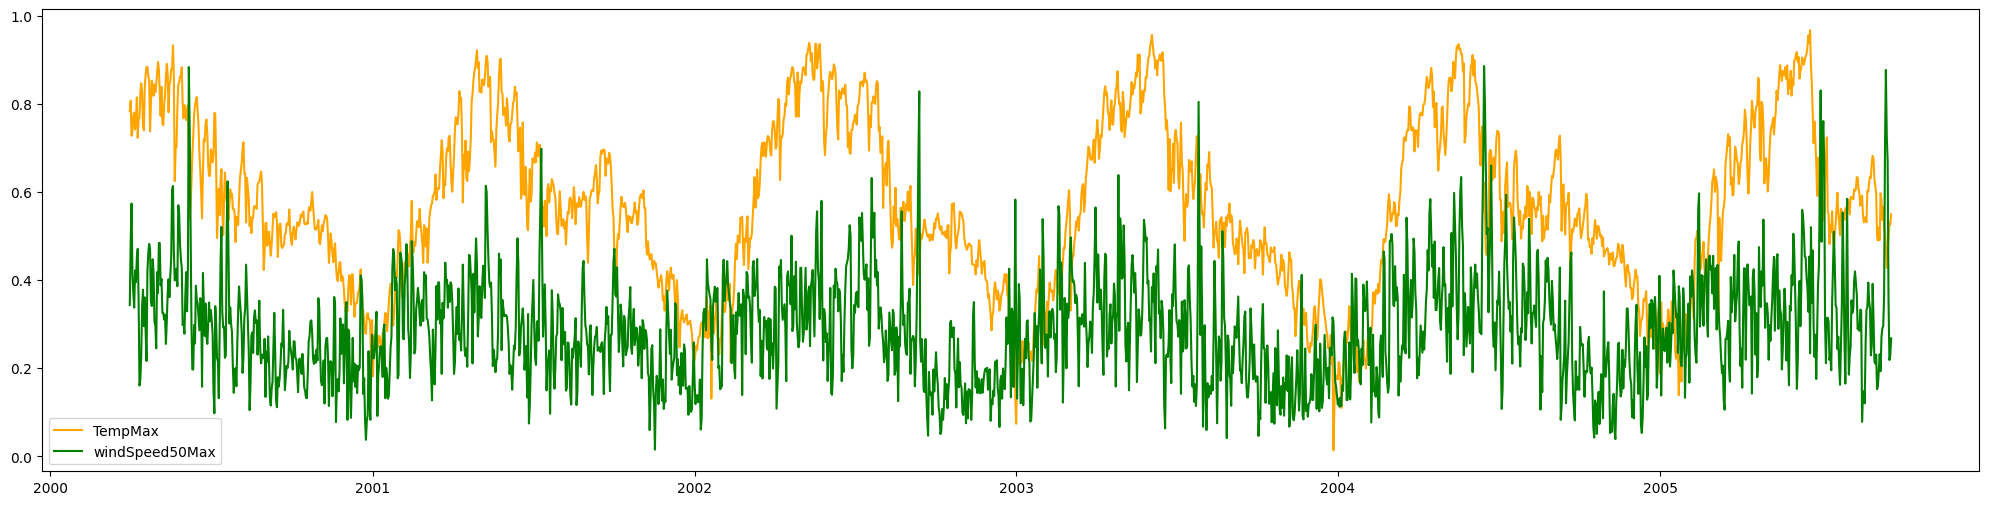

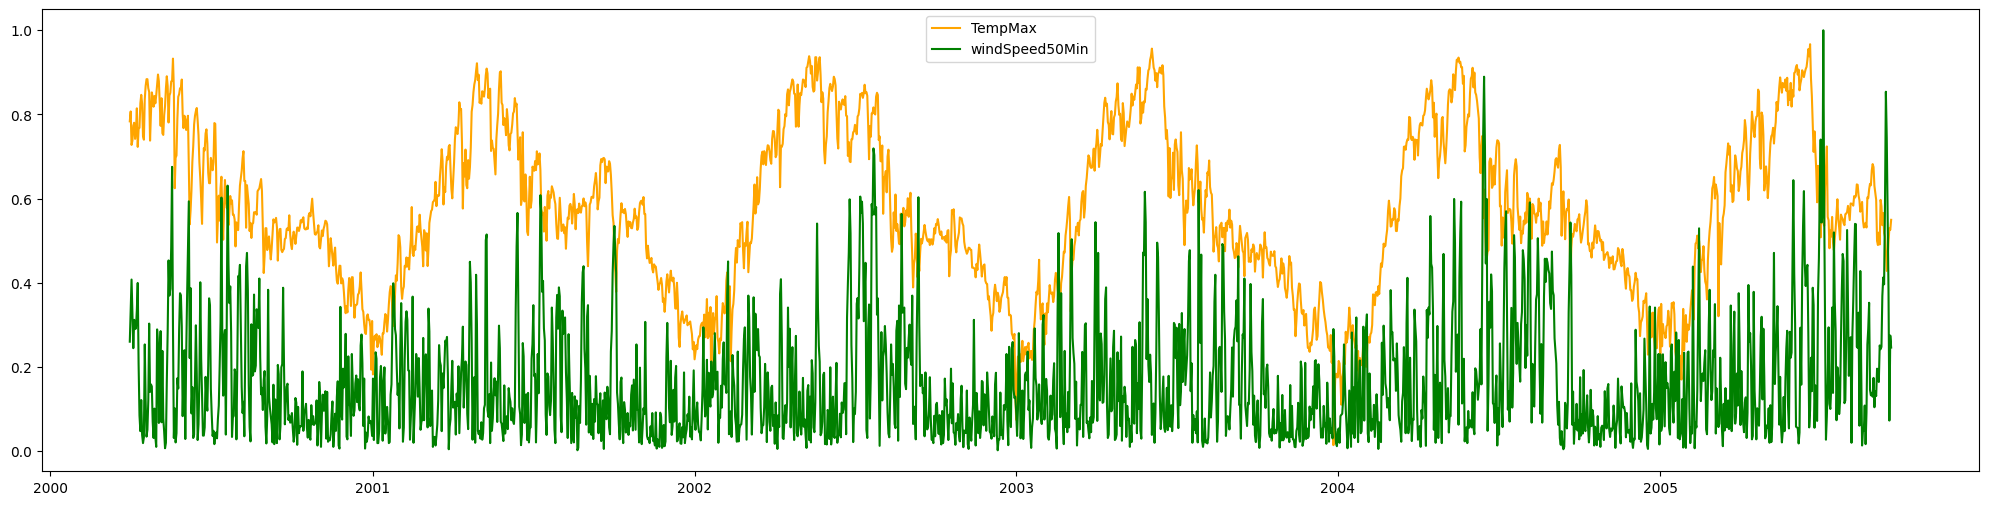

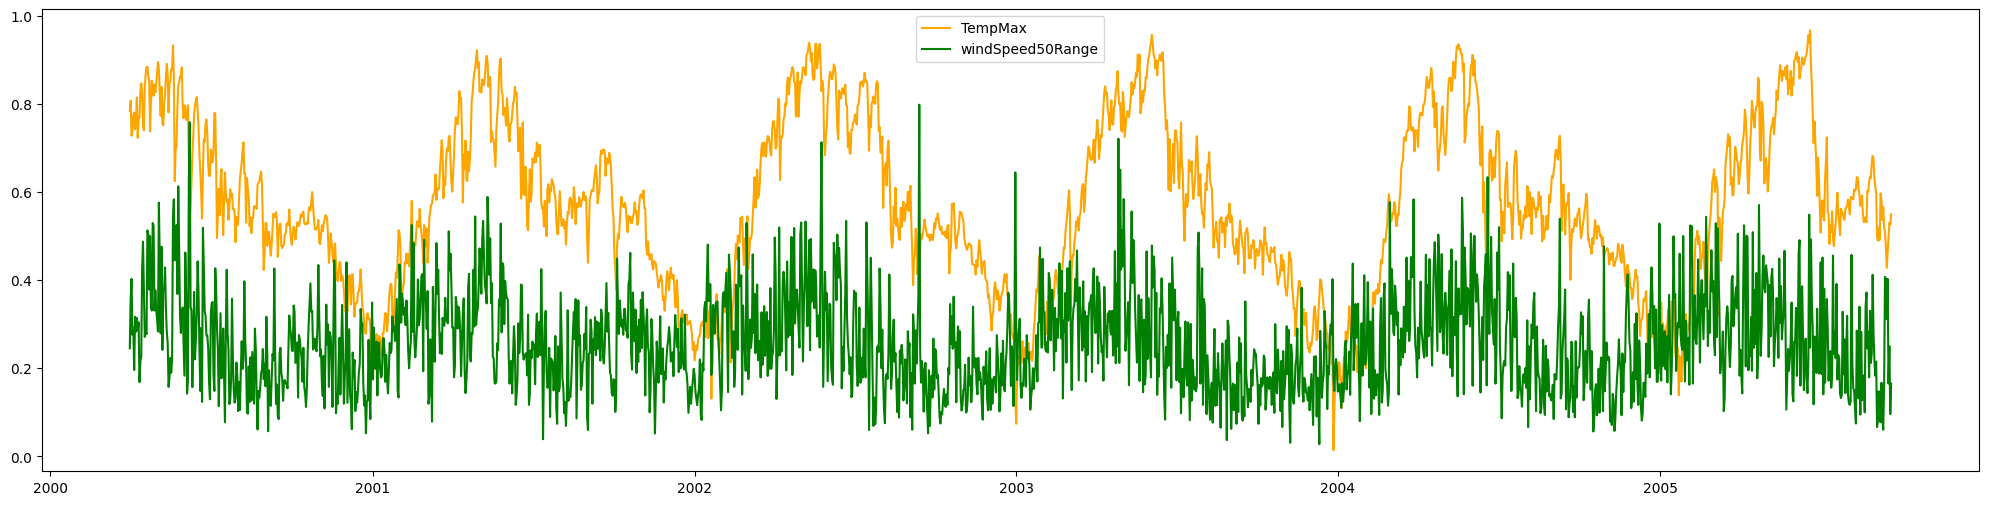

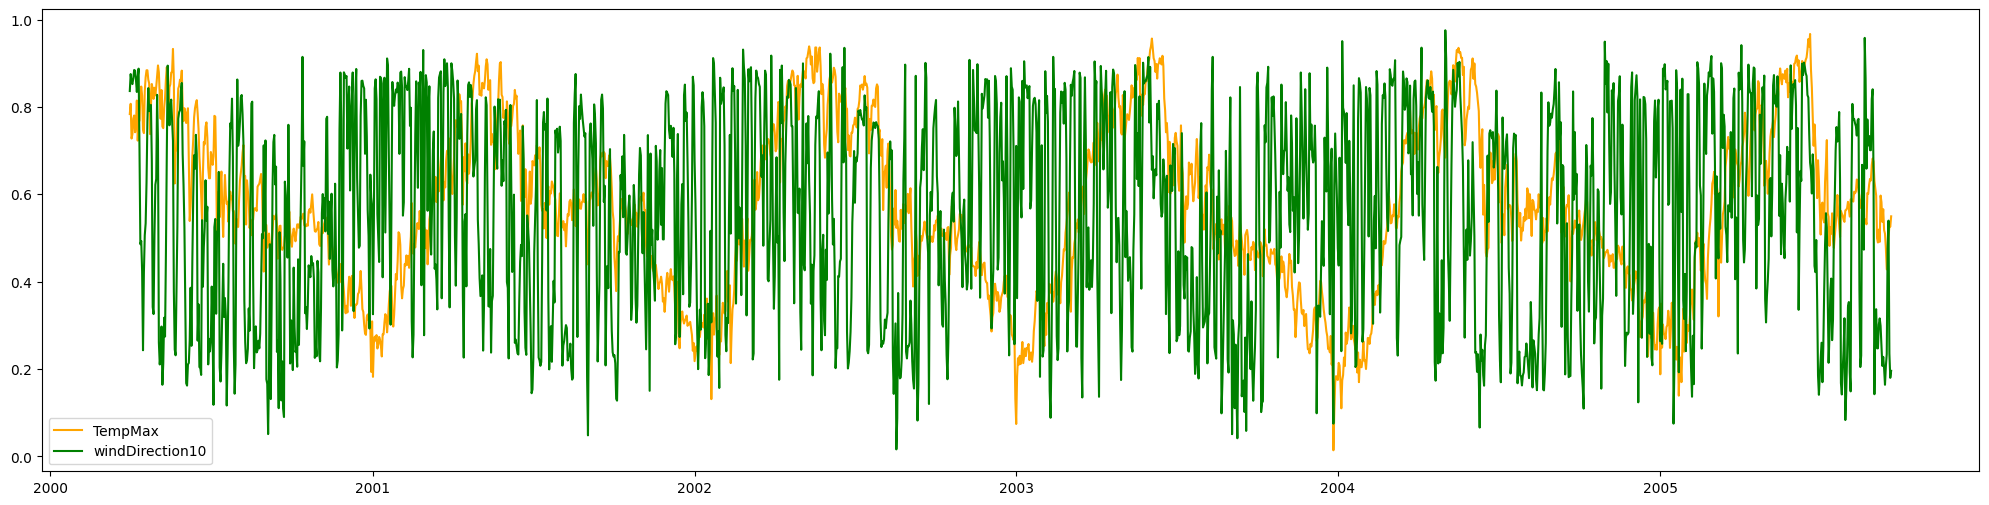

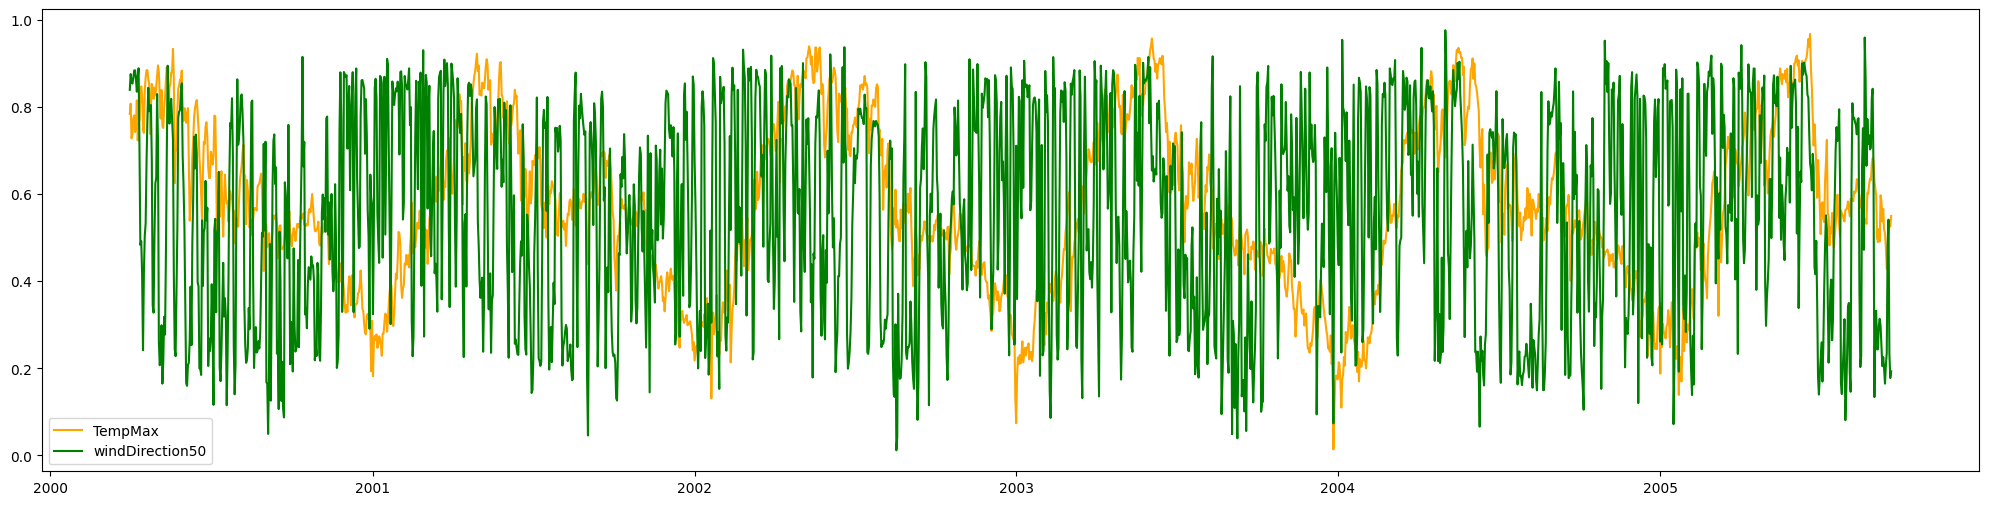

In [5]:
lab = ['tempMax', 'dew', 'earthSkin', 'precipitation', 'pressure',
       'relativeHumidity', 'specificHumidity', 'temp', 'tempMin', 'tempRange',
       'wetBulb', 'windSpeed2', 'windSpeed10', 'windSpeed10Max',
       'windSpeed10Min', 'windSpeed10Range', 'windSpeed50', 'windSpeed50Max',
       'windSpeed50Min', 'windSpeed50Range', 'windDirection10',
       'windDirection50']

for i in range(1, 22):
    plt.figure(figsize=(25, 6))
    plt.plot(df.index[7000:9000], df_transformed[7000:9000,0], c = 'orange', label = 'TempMax')
    plt.plot(df.index[7000:9000], df_transformed[7000:9000,i], c = 'green', label = lab[i])
    plt.legend()

*_Perfect_*
- Earth Skin 
- Pressure 
- Specific Humidity 
- Temperature
- Wet Bulb

*_Okay_*
- Dew
- Relative Humidity
- Minimum Temperature
- Maximum Wind Speed 10 
- Maximum Wind Speed 50 

*_Not Good_*
- Precipitation
- Temperature Range
- Wind Speed 2
- Wind Speed 10
- Minimum Wind Speed 10
- Wind Speed 10 Range
- Wind Speed 50
- Minimum Wind Speed 50
- Wind Speed 50 Range
- Wind Direction10
- Wind Direction 50

In [6]:
cor = df.corr()
cor

tempMax       dew  earthSkin  precipitation  pressure   
tempMax           1.000000  0.137377   0.943856      -0.059974 -0.731231  \
dew               0.137377  1.000000   0.413516       0.382173 -0.607695   
earthSkin         0.943856  0.413516   1.000000       0.085786 -0.863302   
precipitation    -0.059974  0.382173   0.085786       1.000000 -0.276458   
pressure         -0.731231 -0.607695  -0.863302      -0.276458  1.000000   
relativeHumidity -0.432945  0.806793  -0.162365       0.400309 -0.145659   
specificHumidity  0.111816  0.972541   0.389559       0.431440 -0.635759   
temp              0.943738  0.425679   0.994358       0.094186 -0.867469   
tempMin           0.815728  0.634907   0.950032       0.218048 -0.909487   
tempRange         0.103972 -0.884717  -0.211538      -0.465275  0.462161   
wetBulb           0.557096  0.896229   0.771772       0.308935 -0.843077   
windSpeed2        0.386143  0.126255   0.412561       0.116437 -0.475385   
windSpeed10       0.315192  0.043392   0.317211       0.090980 -0.380742   
windSpeed10Max    0.396576  0.014116   0.385853       0.078056 -0.415411   
windSpeed10Min    0.122088  0.028891   0.129325       0.066895 -0.214438   
windSpeed10Range  0.449889 -0.003233   0.429451       0.054863 -0.403321   
windSpeed50       0.266111 -0.010277   0.253333       0.071004 -0.310639   
windSpeed50Max    0.340014 -0.041760   0.318741       0.057482 -0.330591   
windSpeed50Min    0.133858  0.151547   0.175484       0.112707 -0.297189   
windSpeed50Range  0.298256 -0.207362   0.228781      -0.041065 -0.120262   
windDirection10  -0.018854 -0.453985  -0.180398      -0.203550  0.248229   
windDirection50  -0.015466 -0.454353  -0.177490      -0.204258  0.246634   

                  relativeHumidity  specificHumidity      temp   tempMin   
tempMax                  -0.432945          0.111816  0.943738  0.815728  \
dew                       0.806793          0.972541  0.425679  0.634907   
earthSkin                -0.162365          0.389559  0.994358  0.950032   
precipitation             0.400309          0.431440  0.094186  0.218048   
pressure                 -0.145659         -0.635759 -0.867469 -0.909487   
relativeHumidity          1.000000          0.814451 -0.149317  0.106070   
specificHumidity          0.814451          1.000000  0.405138  0.621281   
temp                     -0.149317          0.405138  1.000000  0.958000   
tempMin                   0.106070          0.621281  0.958000  1.000000   
tempRange                -0.834642         -0.899799 -0.225418 -0.490488   
wetBulb                   0.481515          0.867282  0.782900  0.906165   
windSpeed2               -0.083005          0.154646  0.388475  0.381371   
windSpeed10              -0.102645          0.077981  0.288639  0.270648   
windSpeed10Max           -0.180657          0.039191  0.359402  0.323019   
windSpeed10Min            0.000878          0.074903  0.103051  0.107753   
windSpeed10Range         -0.249267         -0.004839  0.413682  0.359929   
windSpeed50              -0.108713          0.028505  0.218625  0.193211   
windSpeed50Max           -0.191073         -0.021550  0.277856  0.230630   
windSpeed50Min            0.105414          0.199109  0.159516  0.194666   
windSpeed50Range         -0.351180         -0.229868  0.192792  0.096758   
windDirection10          -0.375992         -0.449060 -0.178763 -0.291713   
windDirection50          -0.378493         -0.449963 -0.175958 -0.289666   

                  tempRange  ...  windSpeed10  windSpeed10Max  windSpeed10Min   
tempMax            0.103972  ...     0.315192        0.396576        0.122088  \
dew               -0.884717  ...     0.043392        0.014116        0.028891   
earthSkin         -0.211538  ...     0.317211        0.385853        0.129325   
precipitation     -0.465275  ...     0.090980        0.078056        0.066895   
pressure           0.462161  ...    -0.380742       -0.415411       -0.214438   
relativeHumidity  -0.834642  ...   

<Axes: >

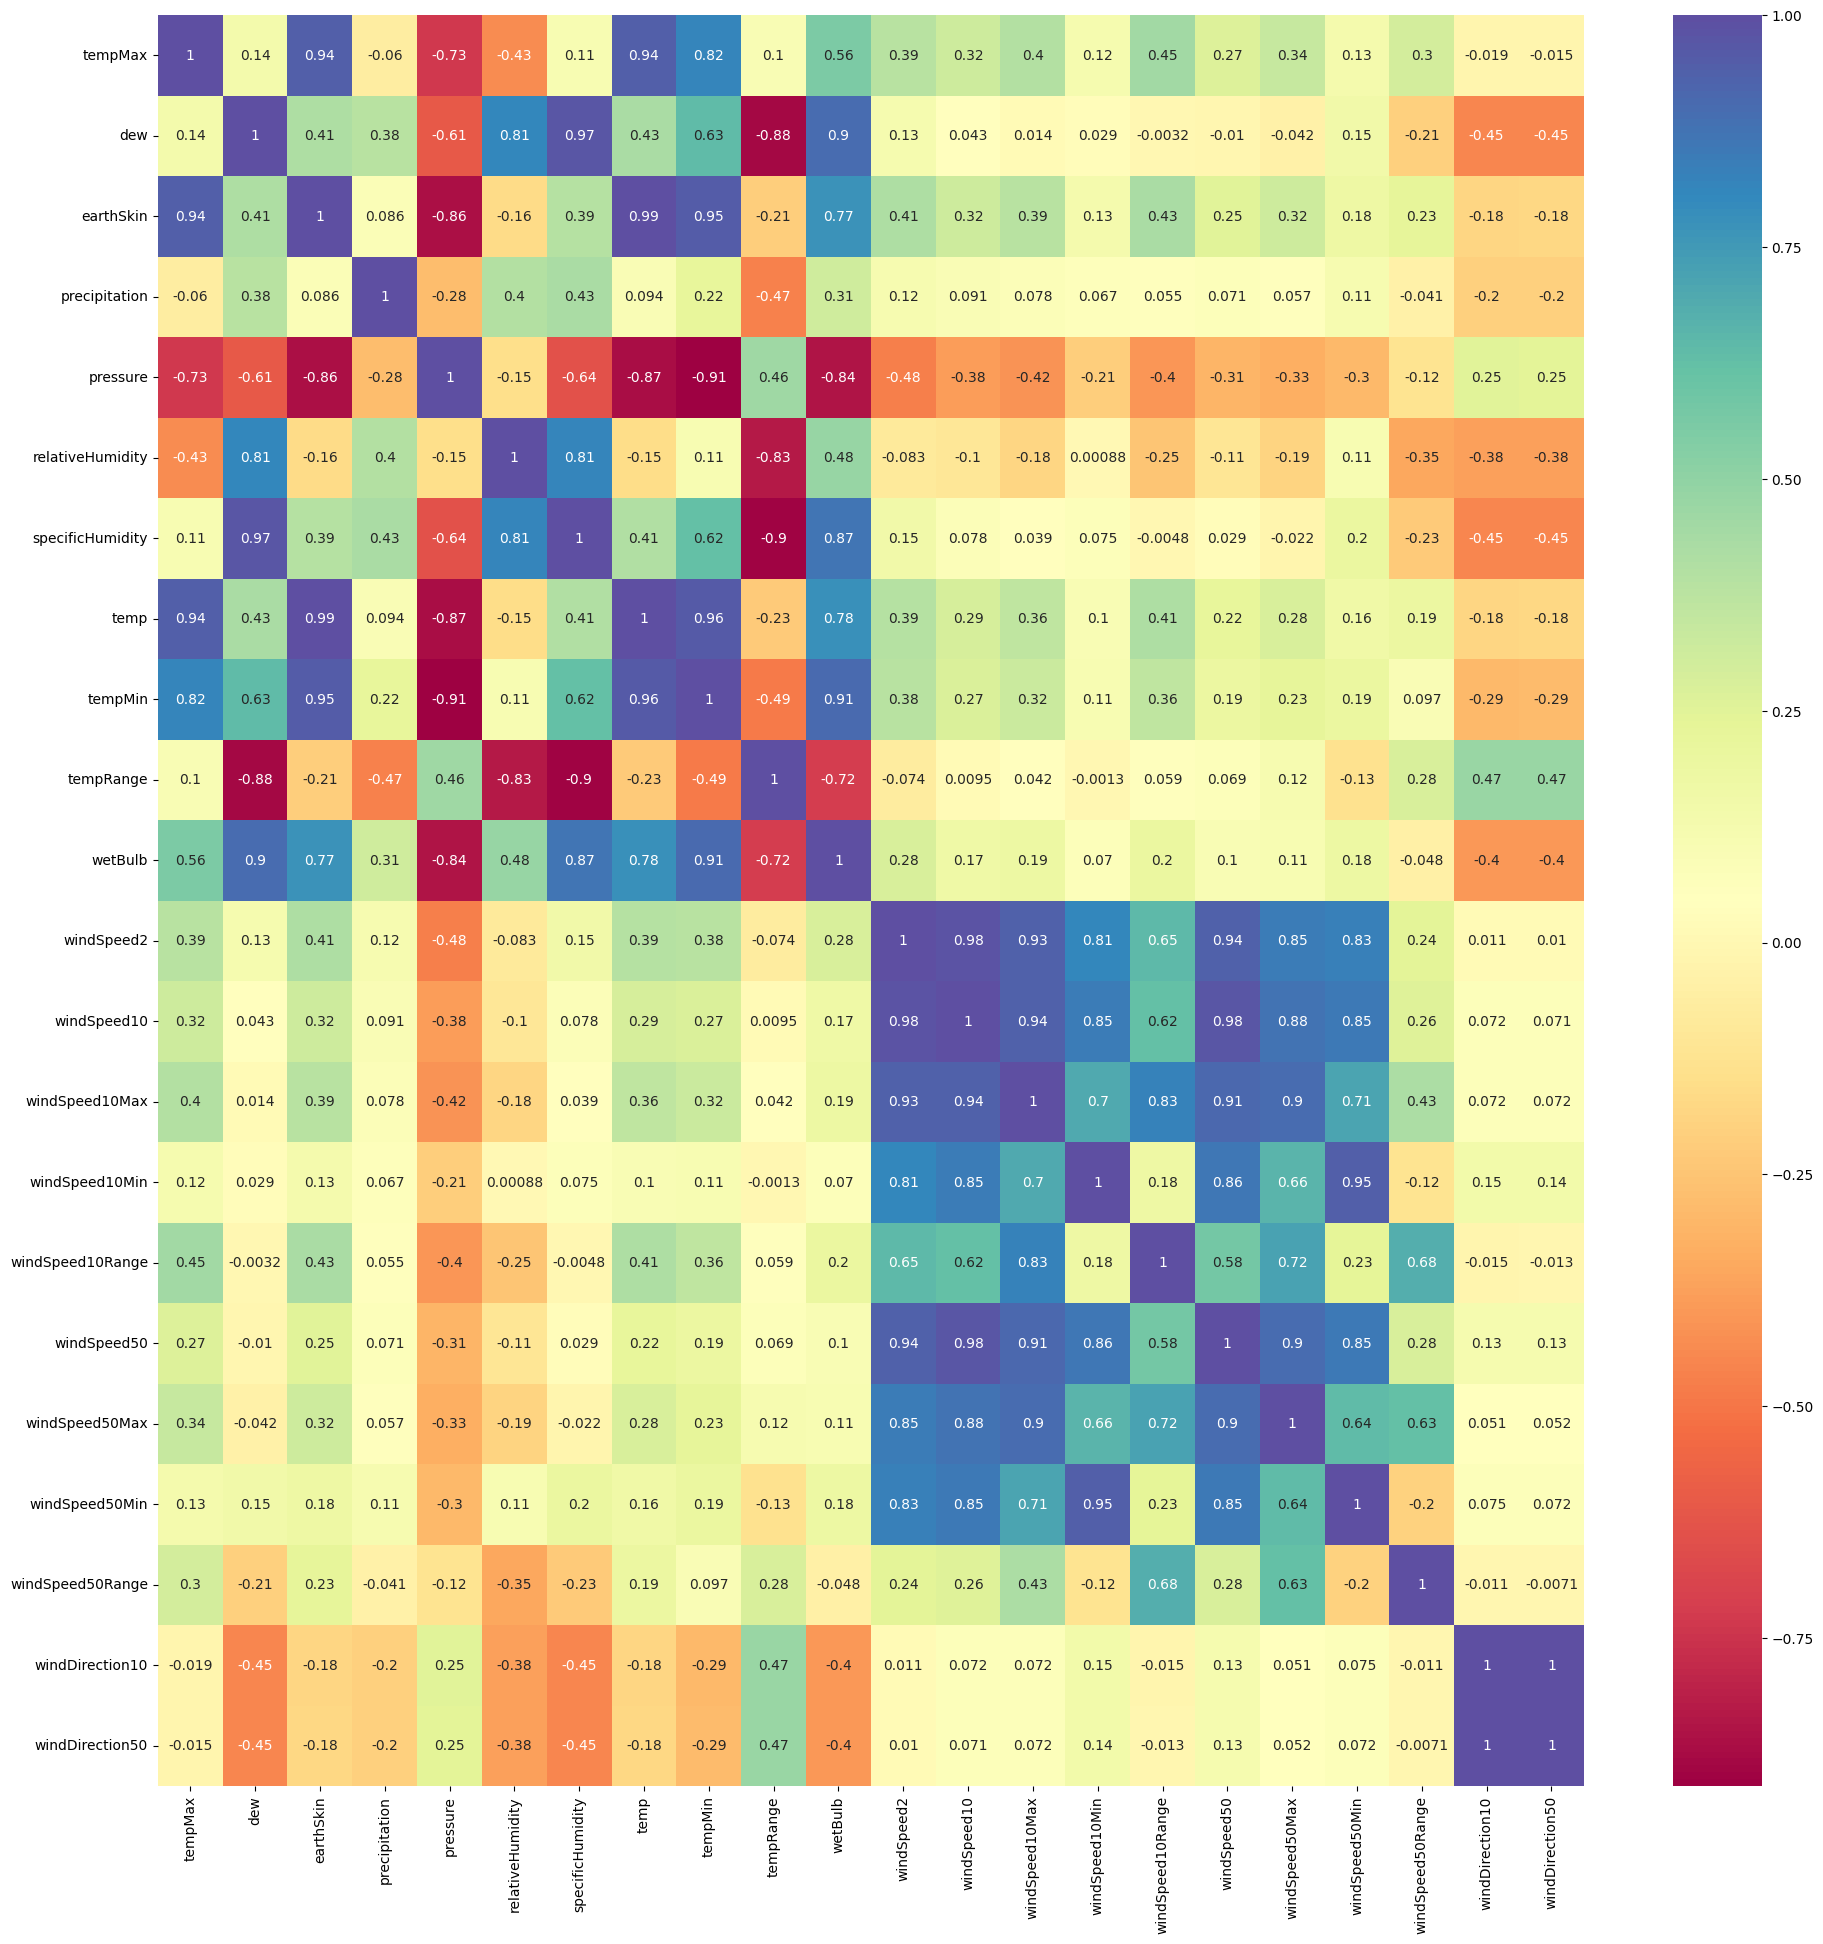

In [7]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(23,23)) 
sns.heatmap(cor,xticklabels= True, yticklabels=True, annot = True, ax=ax, cmap = 'Spectral')